In [16]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

og_df = pd.read_csv('lifespan.csv', header=0, sep=',',skipinitialspace=True) 
analysis_df = og_df.dropna().copy()
analysis_df['BMI'] = analysis_df['mass']/(analysis_df['length']/100)**2
analysis_df = analysis_df[['lifespan','genetic', 
      #'length', 'mass', 
      'exercise', 'smoking',
       'alcohol', 'sugar', 'BMI']]
display(analysis_df.head(10))

,lifespan,genetic,exercise,smoking,alcohol,sugar,BMI
0,86,84.0,2.0,9.0,1.0,2,27.777778
1,100,84.0,3.0,2.0,7.0,3,18.983083
2,87,84.0,3.0,20.0,3.0,2,24.441802
3,91,84.0,2.0,6.0,5.0,3,22.305471
4,83,84.0,2.0,12.0,0.0,2,25.451114
5,89,84.0,2.0,2.0,3.0,3,24.163265
6,80,84.0,2.0,14.0,8.0,1,17.700958
7,77,84.0,1.0,1.0,8.0,3,25.057360
8,73,84.0,1.0,17.0,1.0,2,29.377583
9,73,84.0,1.0,5.0,9.0,2,22.839506


In [17]:
analysis_df.dtypes

lifespan      int64
genetic     float64
exercise    float64
smoking     float64
alcohol     float64
sugar         int64
BMI         float64
dtype: object

In [22]:
analysis_df["alcohol"] = pd.to_numeric(analysis_df['alcohol'], downcast='integer')
analysis_df.head()

,lifespan,genetic,exercise,smoking,alcohol,sugar,BMI
0,86,84.0,2.0,9.0,1,2,27.777778
1,100,84.0,3.0,2.0,7,3,18.983083
2,87,84.0,3.0,20.0,3,2,24.441802
3,91,84.0,2.0,6.0,5,3,22.305471
4,83,84.0,2.0,12.0,0,2,25.451114


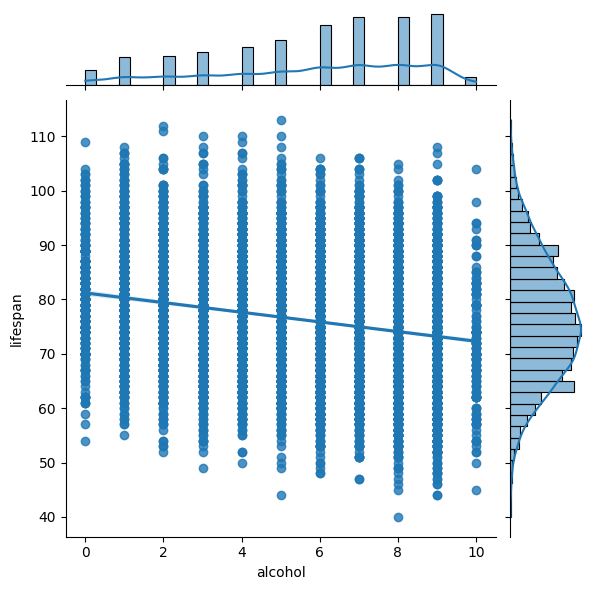

In [23]:
sns.jointplot(data=analysis_df, x="alcohol", y="lifespan",marginal_kws=dict(bins=35), kind='reg')

In [33]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
import numpy as np

X = analysis_df[['alcohol']]
y = analysis_df[['lifespan']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

model = PoissonRegressor()
model.fit(X_train, np.ravel(y_train))
model.score(X_test, np.ravel(y_test))

0.057938389873627205

In [34]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression().fit(X_train, y_train)
model2.score(X_test, y_test)

0.05815019925381837